In [75]:
# Default
import os
from pprint import pprint
import pandas as pd

# OTX API
from OTXv2 import OTXv2
from OTXv2 import IndicatorTypes

from matplotlib import pyplot as plt  


In [6]:
# Initialize the OTXv2 API
otx = OTXv2(os.environ['OTXv2'])

In [ ]:
def load_csv_data(directory: str): 
    """
    Returns a list of pandas dataframes from a folder with csv files.
    """
    dataframe = {}
    abs_dir = os.path.abspath(directory)
    for filename in os.listdir(abs_dir):
        dataframe[filename.split(".")[0]] = pd.read_csv(os.path.join(abs_dir, filename))
        
    return dataframe

In [72]:
def alienvault_check(data: object):
    """
    Check if the IP addresses detected using the urlcrazy are also present in the alienvault platform
    data: (pd.DataFrame) Takes as input pandas data frame object
    """
    unfiltered_list = list(data['DNS-A'][data['DNS-A'].notnull()])
    
    # Filter the list from duplicates
    ip_list = [] 
    [ip_list.append(ip) for ip in unfiltered_list if ip not in ip_list] 
    
    matched_ips = []
    for ip in ip_list:
        try:
            # Get the indicator IPv4 from AlienVault, with section 'general'
            response = otx.get_indicator_details_by_section(indicator_type=IndicatorTypes.IPv4, indicator=ip, section='general') 
            if response['indicator'] in ip_list and response['pulse_info']['count'] > 0:
                matched_ips.append(response['indicator'])
        
        except Exception as server_error:
            print(server_error)
            
    return matched_ips

In [73]:
csv_directory = "data/all_uni_nl"

def matched_ips():
    """
    Loads csv data into an python list and calls the alienvault API to find the matches in the IP address.
    return: (dict) The dictionary contains the list of universities with the matched IP addresses. 
    """
    data = load_csv_data(csv_directory)
    institution_matched_ips = {}
    
    for institution in data.keys():
        # Check the institution on the math
        checked_data = alienvault_check(data[institution])
        institution_matched_ips[institution] = checked_data
        print(f"Finished: {institution}")
    return institution_matched_ips

matched_data = matched_ips()

{'detail': 'IP is private.'}
Server error
Finished: eur
{'detail': 'IP is private.'}
Server error
Finished: maastrichtuniversity
{'detail': 'IP is private.'}
Server error
Finished: ou
{'detail': 'IP is private.'}
Server error
Finished: ru
{'detail': 'IP is private.'}
Server error
{'detail': 'IP is private.'}
Server error
Finished: rug
{'detail': 'IP is private.'}
Server error
Finished: tilburguniversity
{'detail': 'IP is private.'}
Server error
Finished: tudelft
{'detail': 'IP is private.'}
Server error
Finished: tue
{'detail': 'IP is private.'}
Server error
Finished: universiteitleiden
{'detail': 'IP is private.'}
Server error
Finished: utwente
{'detail': 'IP is private.'}
Server error
Finished: uu
{'detail': 'IP is private.'}
Server error
Finished: uva
{'detail': 'IP is private.'}
Server error
{'detail': 'IP is private.'}
Server error
Finished: vu
{'detail': 'IP is private.'}
Server error
Finished: wur


eur - 26
maastrichtuniversity - 4
ou - 17
ru - 29
rug - 23
tilburguniversity - 2
tudelft - 6
tue - 18
universiteitleiden - 4
utwente - 3
uu - 13
uva - 19
vu - 17
wur - 11
Total: 192


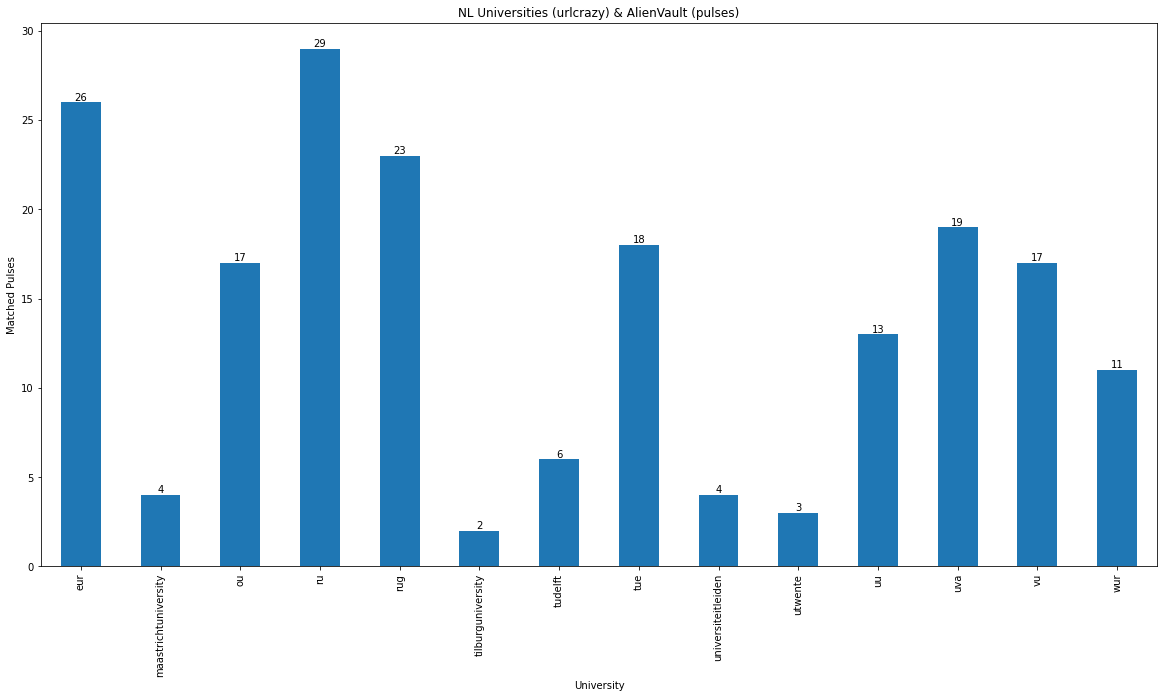

In [109]:
matched_bar_length=[]
matched_bar_title=[]
temp = []
for index, (institution, data) in enumerate(matched_data.items()):
    matched_bar_length.append(len(data))
    matched_bar_title.append(institution)
    temp.append(institution)

# plt.bar(temp, matched_bar_length, 0.5,)  
freq_series = pd.Series(matched_bar_length)

# Plot the figure.
plt.figure(figsize=(20, 10))
ax = freq_series.plot(kind='bar')
ax.set_title('NL Universities (urlcrazy) & AlienVault (pulses)')
ax.set_xlabel('University')
ax.set_ylabel('Matched Pulses')
ax.set_xticklabels(matched_bar_title)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in matched_bar_length]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

data = 0
for institution, length in zip(matched_bar_title, matched_bar_length):
    data += length
    print(f"{institution} - {length}")

print(f"Total: {data}")

In [86]:
pprint(matched_data)

{'eur': ['62.116.130.8',
         '141.138.169.205',
         '52.58.78.16',
         '34.102.136.180',
         '160.153.129.29',
         '91.195.241.136',
         '103.224.182.250',
         '91.195.240.82',
         '52.0.217.44',
         '195.210.46.57',
         '160.153.136.3',
         '144.76.162.245',
         '209.99.40.222',
         '45.79.222.138',
         '91.195.240.94',
         '150.95.255.38',
         '185.53.178.50',
         '193.201.214.49',
         '195.110.124.133',
         '88.198.29.97',
         '69.64.147.10',
         '23.236.62.147',
         '202.124.241.178',
         '212.53.89.138',
         '185.53.177.31',
         '185.68.16.21'],
 'maastrichtuniversity': ['199.59.242.153',
                          '81.169.145.161',
                          '45.79.222.138',
                          '88.198.29.97'],
 'ou': ['52.58.78.16',
        '199.59.242.153',
        '91.195.241.136',
        '192.0.78.24',
        '69.172.201.153',
        '34.102.136.